## Fisher Information 

Note: All x-axis are for theta. They are either 0.0 - 1.0 or multiplied by 8 (to get a more intuitive idea of what theta is, i.e. 1/8 instead of 0.125) for a range of 0 - 8.

In [45]:
import numpy as np
def calculate_indiv_FI(y, theta, M):
    angle = y - (theta * M)
    coeff = 2 * np.pi / M
    
    first_term = ((np.sin(coeff * angle) ** 2) * (1-np.cos(2*np.pi*angle)))/((1-np.cos(coeff*angle))**3)
    second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
    third_term = (-2*M * (np.sin(coeff*angle)) * np.sin(2*np.pi*angle))/ ((1-np.cos(coeff*angle))**2)

    FI = coeff**2 *(first_term + second_term + third_term)
    return FI

def calculate_FI(theta, M):
    FI = np.zeros(len(theta))
    for y in range(M):
        angle = y - (theta * M)
        coeff = 2 * np.pi / M
        
        first_term = ((np.sin(coeff * angle) ** 2) * (1-np.cos(2*np.pi*angle)))/((1-np.cos(coeff*angle))**3)
        second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
        third_term = (-2*M * (np.sin(coeff*angle)) * np.sin(2*np.pi*angle))/ ((1-np.cos(coeff*angle))**2)
        FI += coeff**2 *(first_term + second_term + third_term)
    return FI
        



In [47]:
def calculate_score(y, theta, M):
    angle = y - (theta * M)
    first_term = np.sin(2*np.pi*angle/M)/(1-np.cos(2*np.pi*angle/M))
    second_term = (-M * np.sin(2*np.pi*angle))/(1-np.cos(2*np.pi*angle))
    return 2*np.pi * (first_term + second_term)

def calculate_prob(y, theta, M):
    angle = y - (theta * M)
    numerator = 1 - np.cos(2 * np.pi * angle)
    denominator = 1 - np.cos(2 * np.pi * angle / M)
    coeff = 1 / (M**2)
    prob_y = coeff * numerator/denominator
    return prob_y

def calculate_alt_FI(theta, M):
    FI = np.zeros(len(theta))
    for y in range(M):
        FI += (calculate_score(y, theta, M) ** 2) * (calculate_prob(y, theta, M))
        
    return FI


/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/470096401.py:8: RuntimeWarning: invalid value encountered in divide
  first_term = ((np.sin(coeff * angle) ** 2) * (1-np.cos(2*np.pi*angle)))/((1-np.cos(coeff*angle))**3)
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/470096401.py:9: RuntimeWarning: divide by zero encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/470096401.py:9: RuntimeWarning: invalid value encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/470096401.py:10: RuntimeWarning: divide by zero encountered in divide
  third_term = (-2*M * (np.sin(coeff*angle)) * np.sin(2*np.pi*angle))/ ((1-np.cos(coeff*angle))**2)
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h00

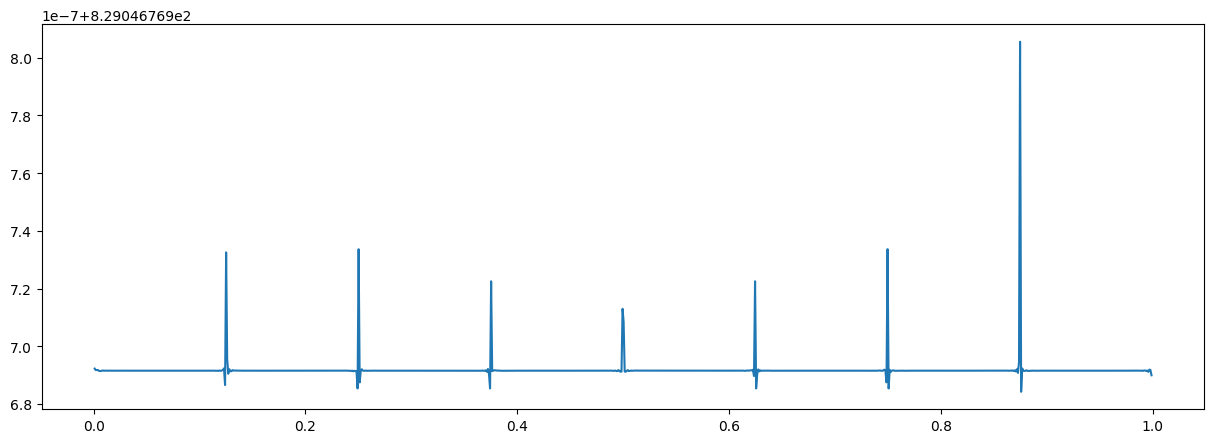

In [22]:
import matplotlib.pyplot as plt
M = 2**3
range_theta = np.linspace(0, 1, 1000)
FI = np.array(calculate_FI(range_theta, M))
fig = plt.figure(figsize = (15, 5))
plt.plot(range_theta, FI)


/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:19: RuntimeWarning: invalid value encountered in divide
  first_term = ((np.sin(coeff * angle) ** 2) * (1-np.cos(2*np.pi*angle)))/((1-np.cos(coeff*angle))**3)
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:20: RuntimeWarning: divide by zero encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:20: RuntimeWarning: invalid value encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:21: RuntimeWarning: divide by zero encountered in divide
  third_term = (-2*M * (np.sin(coeff*angle)) * np.sin(2*np.pi*angle))/ ((1-np.cos(coeff*angle))**2)
/var/folders/jm/5_vb8qrd4wg650hn5xb

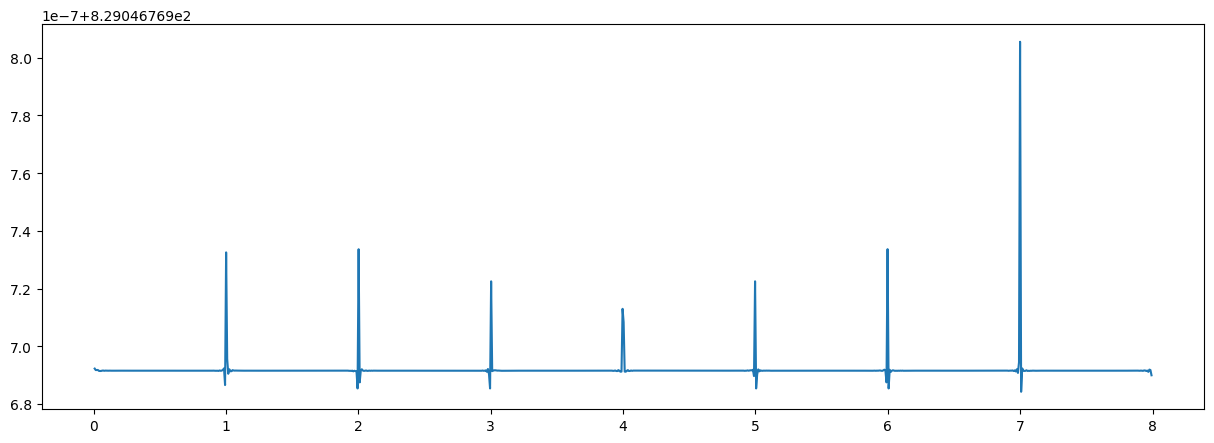

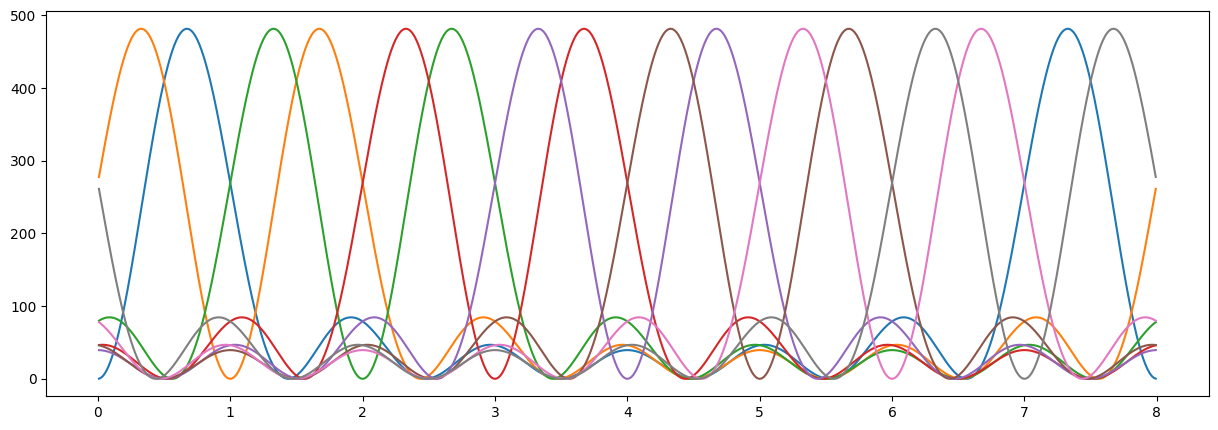

In [53]:
import matplotlib.pyplot as plt
M = 2**3
range_theta = np.linspace(0, 1, 1000)

FI = np.array(calculate_FI(range_theta, M))
#FI = np.nan_to_num(FI, nan=0)
fig = plt.figure(figsize = (15, 5))
plt.plot(range_theta * 8, FI)


fig = plt.figure(figsize = (15, 5))
for y in range(M):
    FI = np.array(calculate_indiv_FI(y, range_theta, M))
    #FI = np.nan_to_num(FI, nan=0)
    plt.plot(range_theta * 8, FI)
    

/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:19: RuntimeWarning: invalid value encountered in divide
  first_term = ((np.sin(coeff * angle) ** 2) * (1-np.cos(2*np.pi*angle)))/((1-np.cos(coeff*angle))**3)
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:20: RuntimeWarning: divide by zero encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:20: RuntimeWarning: invalid value encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:21: RuntimeWarning: divide by zero encountered in divide
  third_term = (-2*M * (np.sin(coeff*angle)) * np.sin(2*np.pi*angle))/ ((1-np.cos(coeff*angle))**2)
/var/folders/jm/5_vb8qrd4wg650hn5xb

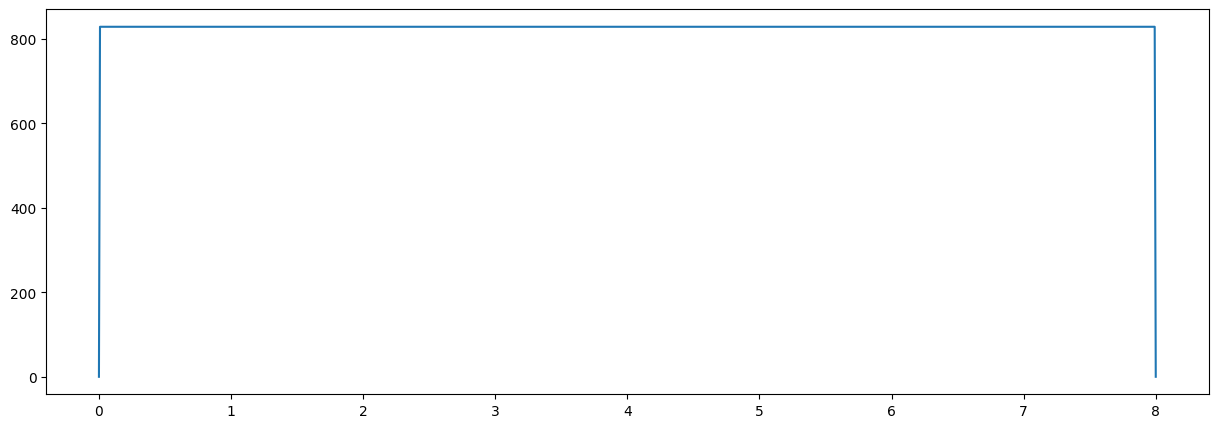

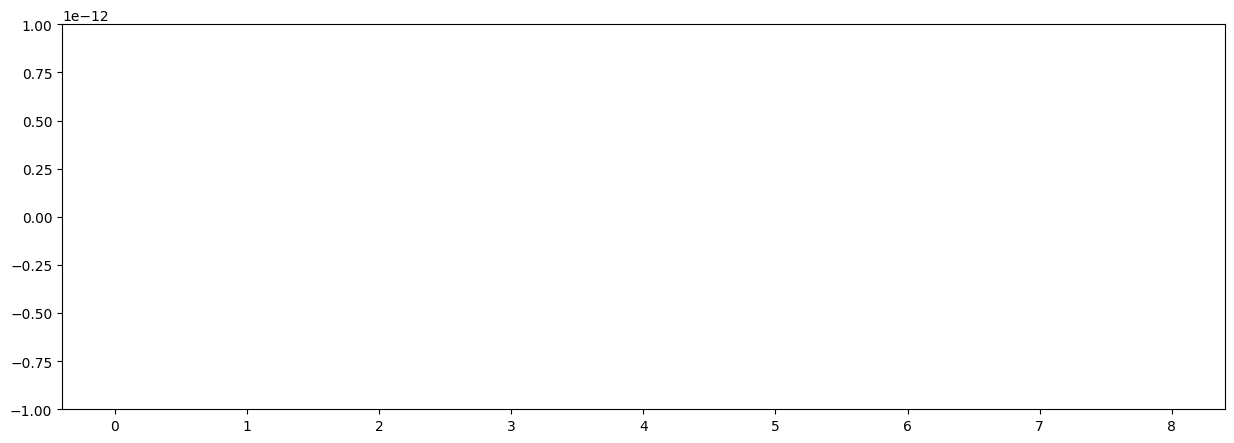

In [58]:
import matplotlib.pyplot as plt
M = 2**3
range_theta = np.linspace(0, 1, 1000)

FI = np.array(calculate_FI(range_theta, M))
FI = np.nan_to_num(FI, nan=0)
fig = plt.figure(figsize = (15, 5))
plt.plot(range_theta * 8, FI)


fig = plt.figure(figsize = (15, 5))
for y in range(M):
    FI = np.array(calculate_indiv_FI(y, range_theta, M))
    FI = np.nan_to_num(FI, nan=0)
    plt.plot(range_theta * 8, FI)

#FI = 
#for y in range(M)

In [ ]:
import matplotlib.pyplot as plt
M = 2**3
range_theta = np.linspace(0, 1, 1000)

FI = np.array(calculate_FI(range_theta, M))
FI = np.nan_to_num(FI, nan=0)
fig = plt.figure(figsize = (15, 5))
plt.plot(range_theta * 8, FI)


fig = plt.figure(figsize = (15, 5))
for y in range(M):
    FI = np.array(calculate_indiv_FI(y, range_theta, M))
    
    FI = np.nan_to_num(FI, nan=0)
    plt.plot(range_theta * 8, FI)

829.0467698055539 829.0467696841935


/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:19: RuntimeWarning: invalid value encountered in divide
  first_term = ((np.sin(coeff * angle) ** 2) * (1-np.cos(2*np.pi*angle)))/((1-np.cos(coeff*angle))**3)
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:20: RuntimeWarning: divide by zero encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:20: RuntimeWarning: invalid value encountered in divide
  second_term = (M ** 2) * (np.sin(2 * np.pi * angle)**2)/((1-np.cos(2*np.pi*angle))*(1-np.cos(coeff*angle)))
/var/folders/jm/5_vb8qrd4wg650hn5xbtrz1h0000gn/T/ipykernel_34024/1292547591.py:21: RuntimeWarning: divide by zero encountered in divide
  third_term = (-2*M * (np.sin(coeff*angle)) * np.sin(2*np.pi*angle))/ ((1-np.cos(coeff*angle))**2)
/var/folders/jm/5_vb8qrd4wg650hn5xb

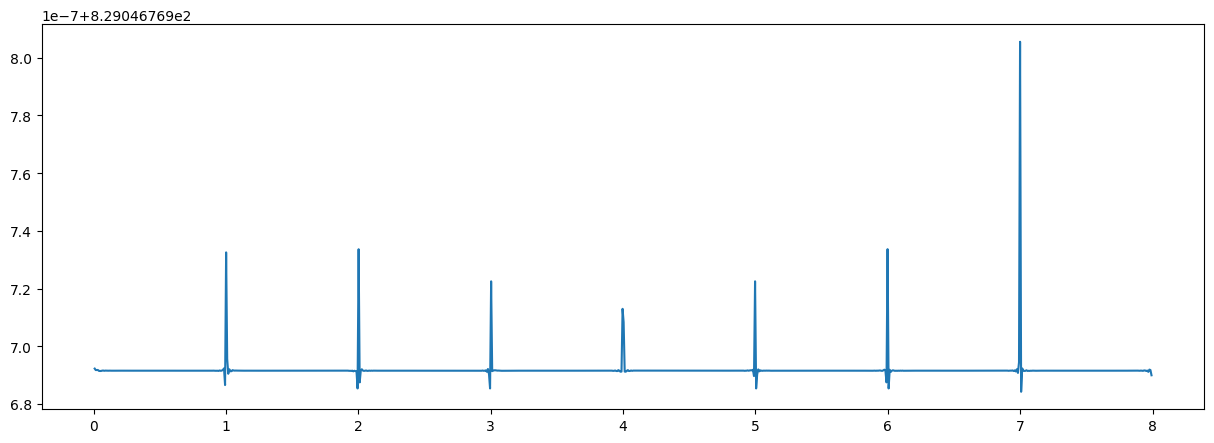

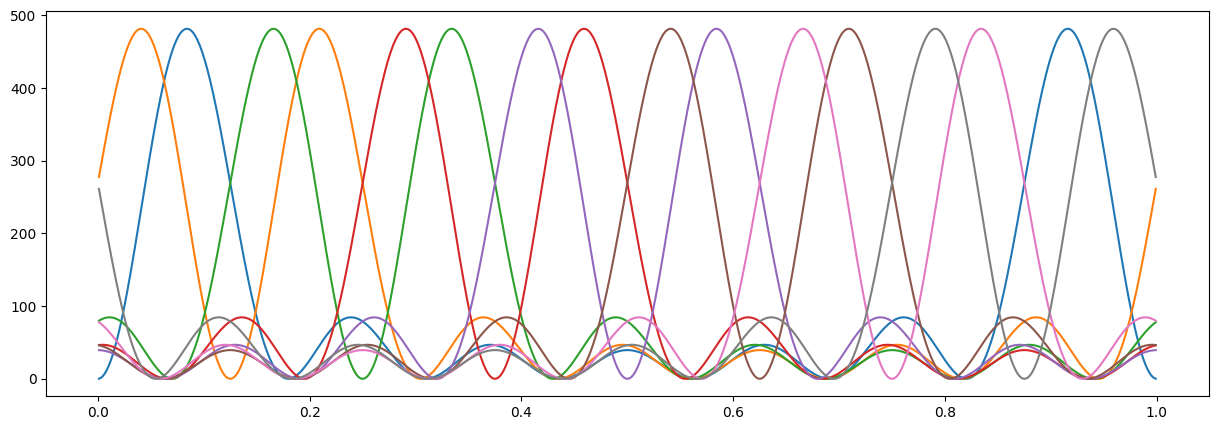

In [62]:
import matplotlib.pyplot as plt
M = 2**3

range_theta = np.linspace(0, 1, 1000)

FI = np.array(calculate_FI(range_theta, M))
range_theta = range_theta[~np.isnan(FI)]
FI = FI[~np.isnan(FI)]
print(max(FI), min(FI)) # why are they both 829.0467698055539 829.0467696841935??
fig = plt.figure(figsize = (15, 5))
plt.plot(range_theta * 8, FI)

fig = plt.figure(figsize = (15, 5))
for y in range(M):
    range_theta = np.linspace(0, 1, 1000)
    FI = np.array(calculate_indiv_FI(y, range_theta, M))
    range_theta = range_theta[~np.isnan(FI)]
    FI = FI[~np.isnan(FI)]
    plt.plot(range_theta, FI)

In [16]:
def calculate_alt_alt_FI(theta, M):
    FI = 0
    for y in range(M):
        FI += (calculate_score(y, theta, M) ** 2) 
        
    return FI

for theta in [0.1, 0.2, 0.3, 0.4]:
    print(calculate_FI(theta, M))
    print(calculate_alt_FI(theta, M))
    print(calculate_alt_alt_FI(theta, M))

442.9927783822859
829.0467696915111
35716.25790561439
25.526477116897745
829.0467696915077
4077.987039577952
2.9899704919394905
829.0467696915076
4077.9870395779467
26.90579626388946
829.0467696915
35716.257905614264
